# EXPLICABILIDAD DEL MODELO

In [18]:
#Comenzamos importando las librerías necesarias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn import neighbors
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [19]:
#Cargamos el conjunto de datos
filename = "../data/base_preprocesado.csv"
data = pd.read_csv(filename)

In [20]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [21]:
#Cargamos el conjunto de datos
filename1 = "../data/X_train_sm.csv"
filename2 = "../data/X_test.csv"
filename3 = "../data/y_train_sm.csv"
filename4 = "../data/y_test.csv"


X_train_sm = pd.read_csv(filename1)
X_test = pd.read_csv(filename2)
y_train_sm = pd.read_csv(filename3)
y_test = pd.read_csv(filename4)


In [22]:
X_train_sm.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V24,V25,V26,V27,V28,Amount
0,-1.256100,2.139058,-2.699754,1.426263,-0.776495,-1.268423,-2.141013,1.007820,-2.165834,-4.140755,...,-0.007541,0.222982,0.779654,0.589911,0.190692,-0.037923,0.493925,0.528873,0.232751,0.493815
1,1.113234,0.481616,0.930518,2.511935,-0.341153,-0.380219,0.024572,-0.091427,-0.690023,0.631219,...,-1.063422,-0.039551,-0.069870,-0.288703,0.381071,0.310128,-0.135710,0.002797,0.037324,34.800000
2,1.085538,0.389565,1.009077,2.836189,-0.468089,-0.309924,0.040433,-0.086432,-0.347694,0.482050,...,-0.753534,-0.082432,-0.033354,0.078485,0.749222,0.600396,0.052128,0.009768,0.029807,29.720000
3,2.135018,-1.218716,-0.899964,-1.103379,-0.776106,0.207614,-1.237263,0.209388,0.151472,0.943100,...,0.989025,-0.034185,0.320357,0.818975,0.084305,-0.138950,-0.098705,-0.013469,-0.057415,32.370000
4,-4.764814,1.989421,-6.181826,2.980101,-2.846651,-2.389712,-3.494652,1.855232,-2.652596,-5.990528,...,0.991643,-0.093413,0.881517,-0.122899,0.032855,-0.146408,0.195096,0.225177,0.049061,249.600646
5,-0.966895,1.079786,2.395885,2.889937,-0.853604,1.212052,-0.224729,0.823333,-1.285726,0.252377,...,1.401014,0.253676,0.100992,0.152653,0.010626,0.071084,0.243015,-0.028087,0.031656,88.570000
6,-0.455989,1.148260,1.201147,0.435811,0.164174,-0.383262,0.339667,0.046688,0.871907,-0.358671,...,0.798683,0.049511,-0.330498,-0.736800,-0.143835,-0.744905,0.062611,0.210789,0.208311,6.540000
7,1.134407,-0.152363,0.755203,0.392482,-0.684138,-0.219545,-0.416225,0.096448,0.172513,0.057031,...,0.112846,0.011976,-0.038755,-0.237845,0.021636,0.133709,0.318382,-0.026931,0.017897,44.980000
8,1.250641,0.304707,0.291318,0.701243,-0.425202,-1.085914,0.051845,-0.172304,0.118126,-0.267254,...,-0.195508,-0.111630,-0.292482,-0.877809,0.329965,0.195869,0.096017,-0.027295,0.030076,4.490000
9,-0.432295,0.936110,1.135926,-0.163907,0.406730,-0.037813,0.460178,0.272397,-0.537140,-0.365428,...,-0.031942,0.075323,-0.209581,-0.577223,-0.377208,-0.239147,0.106584,0.251961,0.080835,4.480000


### IMPORTAMOS EL MODELO DEL FICHERO

In [23]:
import pickle

In [24]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
RFC = pickle.load(open('../models/RFC.pkl','rb'))

In [25]:
# verifico que el objeto se cargó correctamente
RFC

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=100)

### EXPLICABILIDAD DEL MODELO

In [9]:
import shap

In [10]:
shap.initjs()

In [11]:
explainer = shap.TreeExplainer(RFC,X_train_sm)

In [12]:
shap_values = explainer.shap_values(X_test)

100%|===================| 113459/113492 [101:39<00:01]        

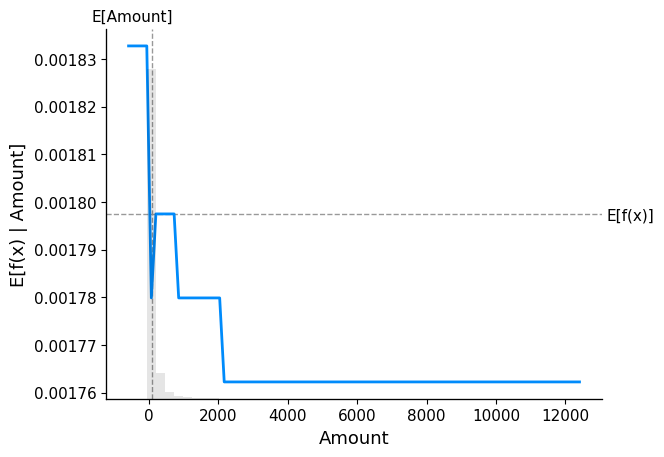

In [16]:
shap.partial_dependence_plot(
    "Amount",
    RFC.predict,
    data=X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [14]:
shap_values

array([[[-0.0003429 ,  0.0003429 ],
        [ 0.00164126, -0.00164126],
        [ 0.00359449, -0.00359449],
        ...,
        [ 0.0008616 , -0.0008616 ],
        [-0.00059367,  0.00059367],
        [ 0.00210405, -0.00210405]],

       [[ 0.0043754 , -0.0043754 ],
        [-0.00163674,  0.00163674],
        [ 0.01377349, -0.01377349],
        ...,
        [ 0.00030733, -0.00030733],
        [-0.00120854,  0.00120854],
        [ 0.00511775, -0.00511775]],

       [[ 0.00106257, -0.00106257],
        [ 0.00503462, -0.00503462],
        [-0.00088647,  0.00088647],
        ...,
        [ 0.00159902, -0.00159902],
        [-0.00067642,  0.00067642],
        [-0.00360246,  0.00360246]],

       ...,

       [[-0.00010637,  0.00010637],
        [ 0.00040429, -0.00040429],
        [ 0.0131571 , -0.0131571 ],
        ...,
        [ 0.00107499, -0.00107499],
        [-0.00039422,  0.00039422],
        [ 0.00470646, -0.00470646]],

       [[ 0.00282143, -0.00282143],
        [ 0.00095953, -0.00

In [15]:
shap_values.shape

(56746, 28, 2)

In [18]:
filas=56746
columnas=28
matriz=np.empty((filas,columnas))
for i in range(filas):
    for j in range(columnas):
        matriz[i,j] = shap_values[i][:,0][j]

In [19]:
matriz.shape

(56746, 28)

In [20]:
shap_values[0][:,0]

array([-3.42903364e-04,  1.64126401e-03,  3.59448743e-03,  2.46165190e-02,
        1.45681394e-03, -2.87579465e-04,  1.45365790e-03, -7.92946738e-04,
       -5.56859180e-04,  2.26360993e-02,  2.54498933e-02,  2.51391165e-02,
        1.77295700e-03,  5.60915605e-02,  3.54238339e-04,  1.28519205e-03,
        3.43030886e-02,  3.91776701e-03,  1.00199601e-03,  1.20855282e-03,
        8.56075688e-04,  3.07395074e-03, -1.62596967e-05, -5.51011066e-04,
        8.16940809e-04,  8.61599253e-04, -5.93670617e-04,  2.10405273e-03])

In [21]:
shap_values[1][:,0]

array([ 4.37539738e-03, -1.63674010e-03,  1.37734907e-02,  6.28817521e-03,
        1.30616957e-03, -4.66812863e-04,  4.67448034e-03,  1.05079236e-03,
       -1.23971410e-03,  1.72807041e-02,  2.69578154e-02,  5.71673040e-03,
        1.31509453e-04,  7.40708216e-02,  3.24023163e-04,  4.43623811e-03,
        4.06818761e-02,  1.30685280e-03,  1.83260038e-03,  6.85284119e-04,
        1.97476410e-03, -6.56547378e-05,  7.14207797e-05,  2.80492451e-03,
       -5.11977315e-04,  3.07327246e-04, -1.20853692e-03,  5.11774571e-03])

In [22]:
shap.force_plot(explainer.expected_value[0], shap_values[0][:,0], X_test.iloc[0,:])

In [23]:
shap.force_plot(explainer.expected_value[0], shap_values[33][:,0], X_test.iloc[33, :])

In [24]:
shap.force_plot(explainer.expected_value[0], shap_values[48][:,0], X_test.iloc[48, :])

In [25]:
shap.force_plot(explainer.expected_value[0], matriz[:100,:], features=X_test.iloc[:100, :])

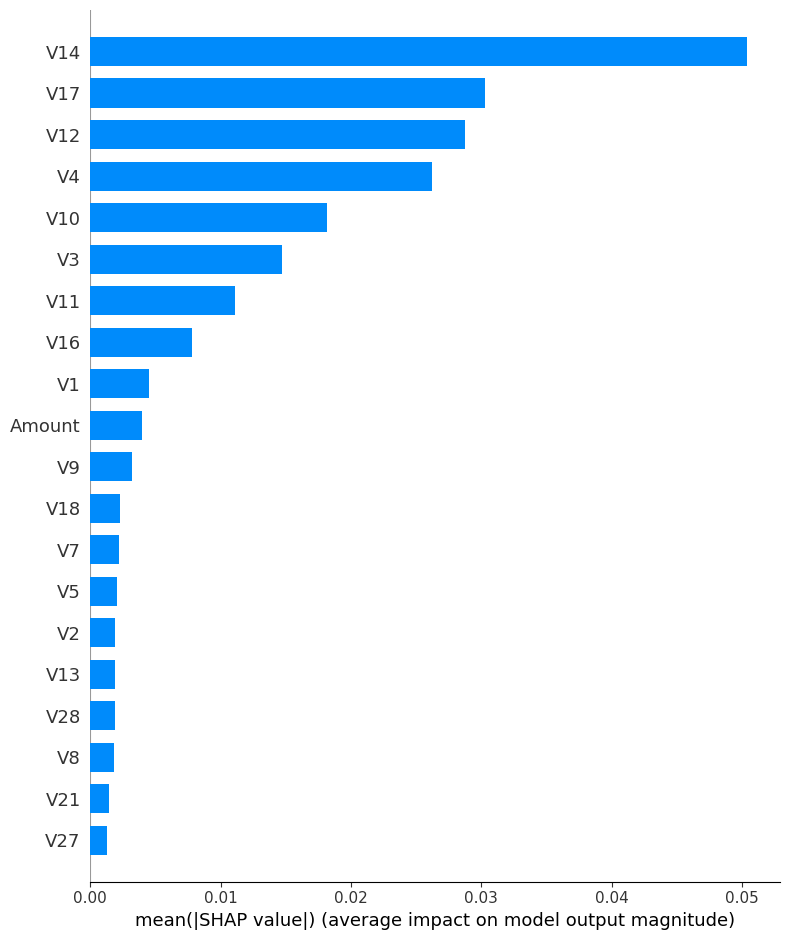

In [26]:
shap.summary_plot(matriz, X_test,plot_type='bar')

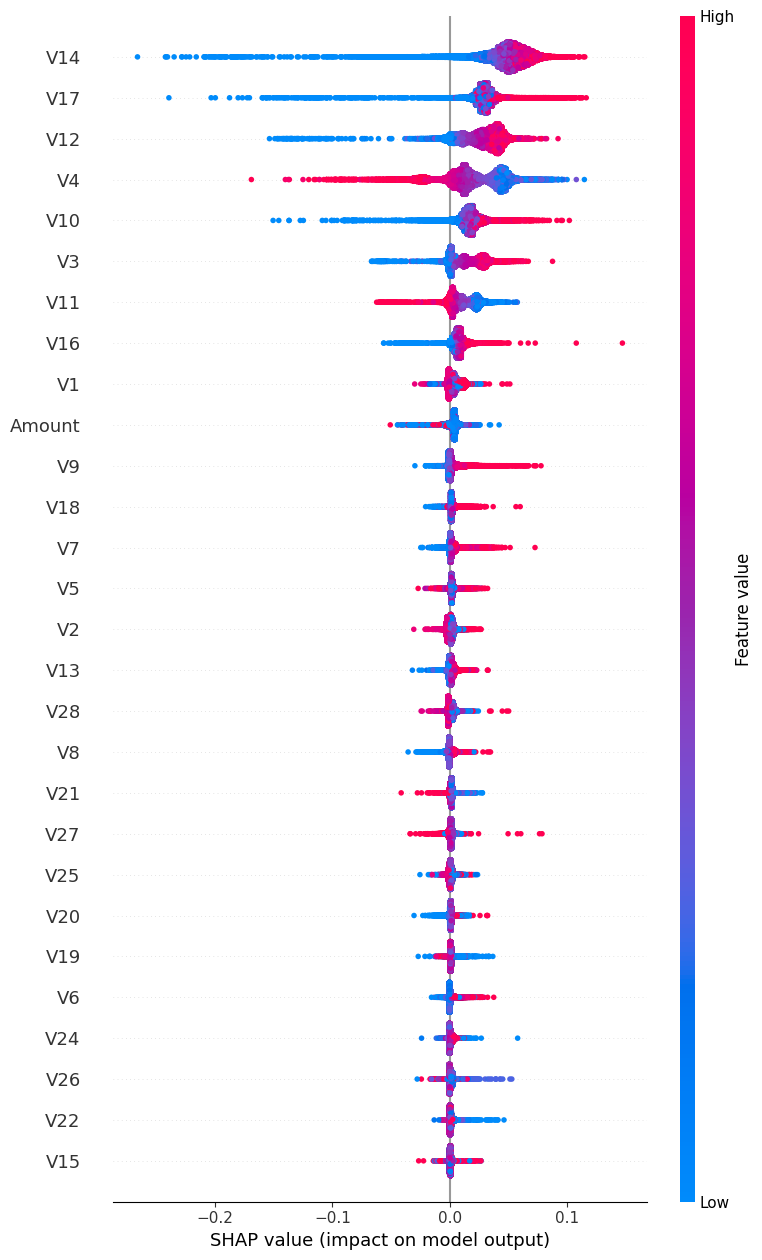

In [27]:
shap.summary_plot(matriz, features=X_test, max_display=30)

In [35]:
y_proba = RFC.predict_proba(X_test)

In [36]:
y_proba

array([[9.99945005e-01, 5.49946923e-05],
       [9.99490116e-01, 5.09883724e-04],
       [9.99872575e-01, 1.27425344e-04],
       ...,
       [9.99823849e-01, 1.76150987e-04],
       [9.99972541e-01, 2.74591574e-05],
       [9.99733566e-01, 2.66434049e-04]])

In [37]:
y_pred_proba = y_proba[:, 1]

In [38]:
y_pred_proba

array([5.49946923e-05, 5.09883724e-04, 1.27425344e-04, ...,
       1.76150987e-04, 2.74591574e-05, 2.66434049e-04])

In [42]:
import pandas as pd

# Asegúrate de que y_pred_proba y y_test sean Series
y_pred_proba_series = pd.Series(y_pred_proba)
#y_test_series = pd.Series(y_test).reset_index(drop=True)

# Concatenar las Series
df_proba = pd.concat([y_pred_proba_series, y_test], axis=1)


In [43]:
df_proba.describe().T

,count,mean,std,min,25%,50%,75%,max
0,56746.0,0.005922,0.042214,0.0,0.000089,0.000217,0.001782,0.999999
Class,56746.0,0.001815,0.042566,0.0,0.000000,0.000000,0.000000,1.000000


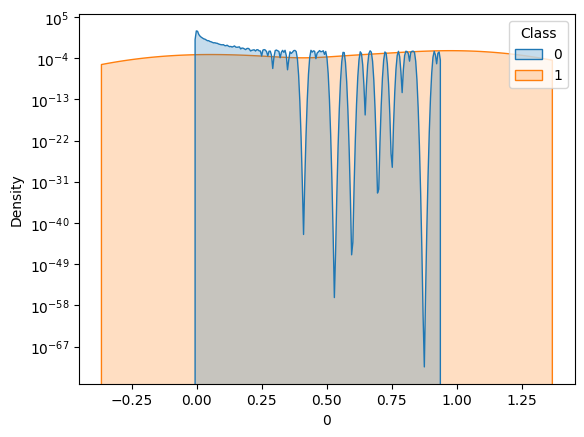

In [45]:
sns.kdeplot(data=df_proba,x=0,hue='Class',fill=True)
plt.yscale('log')  

In [ ]:
# Supongamos que tienes los valores SHAP en un array o DataFrame llamado shap_values
# y las características correspondientes en un array o DataFrame llamado features
features = X_test.columns
# Crear un DataFrame con los valores SHAP y las características
shap_df = pd.DataFrame(shap_values, columns=features)

# Guardar el DataFrame en un archivo CSV
shap_df.to_csv('../data/shap_values.csv', index=False)

# O guardar el DataFrame en un archivo Excel
shap_df.to_excel('shap_values.xlsx', index=False)